# Micro(Neuron-wise) Analysis
1. Anaylsis co-appearance of neurons
2. Find lack concepts

### Method
1. CLIP-Dissect
    - D Prob: Konkle Object
    - Concept: BabyVocab + Classname, BabyVocab + Classname + 30k   
        The more concepts, the neurons assigned to concepts should be more robust.



In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('..')

In [3]:
concept_choice = "BabyVocab + Classname + 30k"

if concept_choice == "BabyVocab + Classname + 30k":
    cvcl_neuron_descriptions = pd.read_csv('neuron_concepts/cvcl-resnext_24_10_14_14_36/descriptions.csv')
    cvcl_random_neuron_descriptions = pd.read_csv('neuron_concepts/cvcl-random_24_10_14_13_47/descriptions.csv')
    clip_neuron_descriptions = pd.read_csv('neuron_concepts/clip-res_24_10_14_13_45/descriptions.csv')
    resnext_neuron_descriptions = pd.read_csv('neuron_concepts/resnext_24_10_14_16_20/descriptions.csv')
    dino_say_neuron_descriptions = pd.read_csv('neuron_concepts/dino_say_konk_baby+konk+30k.csv')
    dino_s_neuron_descriptions = pd.read_csv('neuron_concepts/dino_s_konk_baby+konk+30k.csv')
    dino_a_neuron_descriptions = pd.read_csv('neuron_concepts/dino_a_konk_baby+konk+30k.csv')
    dino_y_neuron_descriptions = pd.read_csv('neuron_concepts/dino_y_konk_baby+konk+30k.csv')
elif concept_choice == "BabyVocab + Classname":
    cvcl_neuron_descriptions = pd.read_csv('neuron_concepts/cvcl_konk_baby+konk.csv')
    cvcl_random_neuron_descriptions = pd.read_csv('neuron_concepts/cvcl_random_konk_baby+konk.csv')
    clip_neuron_descriptions = pd.read_csv('neuron_concepts/clip_konk_baby+konk.csv')
else:
    raise ValueError("Invalid concept choice")

Plt class and neuron

In [4]:
from datasets.object_dataset import get_class_names, get_baby_seen_class, get_baby_unseen_class

class_names = get_class_names('/home/Dataset/xueyi/KonkLab/17-objects')
baby_seen_class = get_baby_seen_class(class_names)
baby_unseen_class = get_baby_unseen_class(class_names)
print(baby_seen_class)
print(baby_unseen_class)


['basket', 'cat', 'scissors', 'tree', 'stamp', 'leaves', 'key', 'juice', 'dog', 'bed', 'socks', 'coin', 'broom', 'cheese', 'backpack', 'pants', 'guitar', 'shoe', 'sofa', 'bell', 'cookie', 'desk', 'crib', 'spoon', 'necklace', 'knife', 'pizza', 'tricycle', 'bucket', 'camera', 'jacket', 'bottle', 'fan', 'stool', 'cake', 'train', 'umbrella', 'tv', 'bagel', 'bike', 'hairbrush', 'bench', 'rock', 'sandwich', 'bird', 'balloon', 'butterfly', 'apple', 'turtle', 'toothpaste', 'phone', 'hat', 'watch', 'ring', 'airplane', 'microwave', 'ball', 'chair', 'kayak', 'pipe', 'pen', 'bowl', 'clock', 'button']
['razor', 'radio', 'domino', 'ringbinder', 'mushroom', 'wig', 'headband', 'cherubstatue', 'abacus', 'armyguy', 'licenseplate', 'earings', 'orifan', 'meat', 'powerstrip', 'cellphone', 'stapler', 'coatrack', 'headphone', 'telescope', 'mask', 'grill', 'exercise_equipment', 'compass', 'trumpet', 'wineglass', 'christmasstocking', 'handgun', 'snowglobe', 'frisbee', 'rosary', 'cushion', 'tongs', 'rug', 'mp3p

Coverage Comparison:
                 In-vocab (%)  Out-of-vocab (%)  Total (%)
ResNext50               68.75             58.82      62.00
CLIP-RN50               68.75             53.68      58.50
CVCL-ResNext50          48.44             45.59      46.50
DINO-S-ResNext          56.25             39.71      45.00
CVCL-Randomized         23.44             30.15      28.00


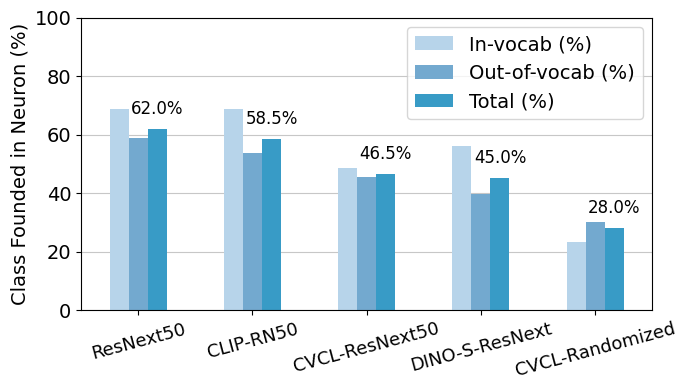

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to calculate coverage
def calculate_coverage(model_classes, baby_seen, baby_unseen):
    all_classes = set(baby_seen + baby_unseen)
    described_classes = set(model_classes['description'].str.lower().unique())
    missing_seen = set(baby_seen) - described_classes
    missing_unseen = set(baby_unseen) - described_classes
    
    seen_coverage = round((len(baby_seen) - len(missing_seen)) / len(baby_seen) * 100, 2)
    unseen_coverage = round((len(baby_unseen) - len(missing_unseen)) / len(baby_unseen) * 100, 2)
    total_coverage = round((len(all_classes) - len(missing_seen.union(missing_unseen))) / len(all_classes) * 100, 2)
    
    return {
        'Seen Coverage': seen_coverage,
        'Unseen Coverage': unseen_coverage,
        'Total Coverage': total_coverage,
        'Missing Seen': missing_seen,
        'Missing Unseen': missing_unseen
    }

# Dictionary of models and their corresponding neuron descriptions
model_descriptions = {
    'ResNext50': resnext_neuron_descriptions,
    'CLIP-RN50': clip_neuron_descriptions,

    # 'DINO A': dino_a_neuron_descriptions,
    # 'DINO Y': dino_y_neuron_descriptions,
    # 'DINO-SAY-ResNext': dino_say_neuron_descriptions,
    'CVCL-ResNext50': cvcl_neuron_descriptions,
    'DINO-S-ResNext': dino_s_neuron_descriptions,

    'CVCL-Randomized': cvcl_random_neuron_descriptions,
}

# Calculate coverage for each model
results = {model: calculate_coverage(desc, baby_seen_class, baby_unseen_class) 
           for model, desc in model_descriptions.items()}

# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({model: {
    'In-vocab (%)': results[model]['Seen Coverage'],
    'Out-of-vocab (%)': results[model]['Unseen Coverage'],
    'Total (%)': results[model]['Total Coverage']
} for model in model_descriptions.keys()}).T

# Ensure all data is numeric
comparison_df = comparison_df.astype(float)

# Display the comparison table
print("Coverage Comparison:")
print(comparison_df.to_string(float_format=lambda x: f'{x:.2f}'))

# Define colors using colormaps
seen_color = plt.cm.Blues(0.3)  # Light blue from Blues colormap
unseen_color = plt.cm.PuBu(0.5)  # Medium blue-purple from PuBu colormap
total_color = plt.cm.GnBu(0.7)  # Darker green-blue from GnBu colormap

# Visualize the results
plt.figure(figsize=(7, 4))
ax = plt.gca()
ax.set_facecolor('white')  # Set axes background to white

ax = comparison_df.plot(kind='bar', ax=ax, width=0.5, 
                  color=[seen_color, unseen_color, total_color],
                  zorder=2) 

# Rotate x-axis labels to normal (0 degrees)
plt.xticks(rotation=15, fontsize=13)

# Set y-axis to 100% coverage
plt.ylim(0, 100)
plt.yticks(fontsize=14)

# plt.title('Neuron Corresponding Class Coverage', fontsize=18, pad=20)
plt.ylabel('Class Founded in Neuron (%)', fontsize=14)
# plt.xlabel('Models', fontsize=18)
plt.legend(loc='upper right', fontsize=14, title_fontsize=14, frameon=True)


# Remove grid
plt.grid(True, axis='y', alpha=0.7, zorder=0)  # Lower alpha for lighter lines, zorder=0 to put grid behind bars

# Add value labels on top of each bar for total coverage only, slightly to the right
for container in ax.containers[2::3]:  # Select every third container starting from the third one (total coverage)
    ax.bar_label(container, 
                 fmt='%.1f%%', 
                 padding=8,  # Reduce padding to align closer to bars
                 label_type='edge',  # Use edge alignment
                 fontsize=12)
    
plt.tight_layout()
plt.savefig('plots/class_coverage.pdf', dpi=300)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to calculate coverage
def calculate_coverage(model_classes, baby_seen, baby_unseen):
    all_classes = set(baby_seen + baby_unseen)
    described_classes = set(model_classes['description'].str.lower().unique())
    missing_seen = set(baby_seen) - described_classes
    missing_unseen = set(baby_unseen) - described_classes
    
    seen_coverage = round((len(baby_seen) - len(missing_seen)) / len(baby_seen) * 100, 2)
    unseen_coverage = round((len(baby_unseen) - len(missing_unseen)) / len(baby_unseen) * 100, 2)
    total_coverage = round((len(all_classes) - len(missing_seen.union(missing_unseen))) / len(all_classes) * 100, 2)
    
    return {
        'Seen Coverage': seen_coverage,
        'Unseen Coverage': unseen_coverage,
        'Total Coverage': total_coverage,
        'Missing Seen': missing_seen,
        'Missing Unseen': missing_unseen
    }

# Dictionary of models and their corresponding neuron descriptions
model_descriptions = {
    'ResNext50': resnext_neuron_descriptions,
    'CLIP-RN50': clip_neuron_descriptions,

    # 'DINO A': dino_a_neuron_descriptions,
    # 'DINO Y': dino_y_neuron_descriptions,
    # 'DINO-SAY-ResNext': dino_say_neuron_descriptions,
    'CVCL-ResNext50': cvcl_neuron_descriptions,
    'DINO-S-ResNext': dino_s_neuron_descriptions,

    'CVCL-Randomized': cvcl_random_neuron_descriptions,
}

# Calculate coverage for each model
results = {model: calculate_coverage(desc, baby_seen_class, baby_unseen_class) 
           for model, desc in model_descriptions.items()}

# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({model: {
    'In-vocab (%)': results[model]['Seen Coverage'],
    'Out-of-vocab (%)': results[model]['Unseen Coverage'],
    'Total (%)': results[model]['Total Coverage']
} for model in model_descriptions.keys()}).T


Analysis coappeared neurons

In [7]:
top_neurons = {}
for model, df in model_descriptions.items():
    top_neurons[model] = df.nlargest(10, 'similarity')

# 创建比较表格
comparison_table = pd.DataFrame({
    model: {
        'Top Description': top_df['description'].iloc[0],
        'Top Similarity': top_df['similarity'].iloc[0],
        'Layer': top_df['layer'].iloc[0]
    } for model, top_df in top_neurons.items()
}).T

print(comparison_table)

                Top Description Top Similarity                        Layer
ResNext50             windchime       0.513641                       layer4
CLIP-RN50               dresser        0.49472                visual.layer4
CVCL-ResNext50        windchime       0.381531  vision_encoder.model.layer2
DINO-S-ResNext        windchime       0.376251                       layer3
CVCL-Randomized           broom       0.240326  vision_encoder.model.layer1


In [8]:
common_descriptions = {}
for model, df in model_descriptions.items():
    common_descriptions[model] = df['description'].value_counts().head(10)

# 创建频率比较表格
freq_comparison = pd.DataFrame(common_descriptions)
print(freq_comparison)

                   ResNext50  CLIP-RN50  CVCL-ResNext50  DINO-S-ResNext  \
bagel                   63.0      114.0            86.0           102.0   
bird                    47.0        NaN             NaN             NaN   
blue                     NaN        NaN             NaN             NaN   
bonsai                  45.0        NaN             NaN             NaN   
broom                    NaN       52.0            76.0            93.0   
button                   NaN        NaN            79.0             NaN   
calculator               NaN        NaN           137.0            74.0   
calculators              NaN        NaN            86.0            65.0   
chessboard             103.0       88.0           406.0           370.0   
cover                    NaN       53.0             NaN             NaN   
frisbee                  NaN        NaN           108.0           141.0   
gardenjewelrykids        NaN       53.0            63.0            77.0   
garrison                 

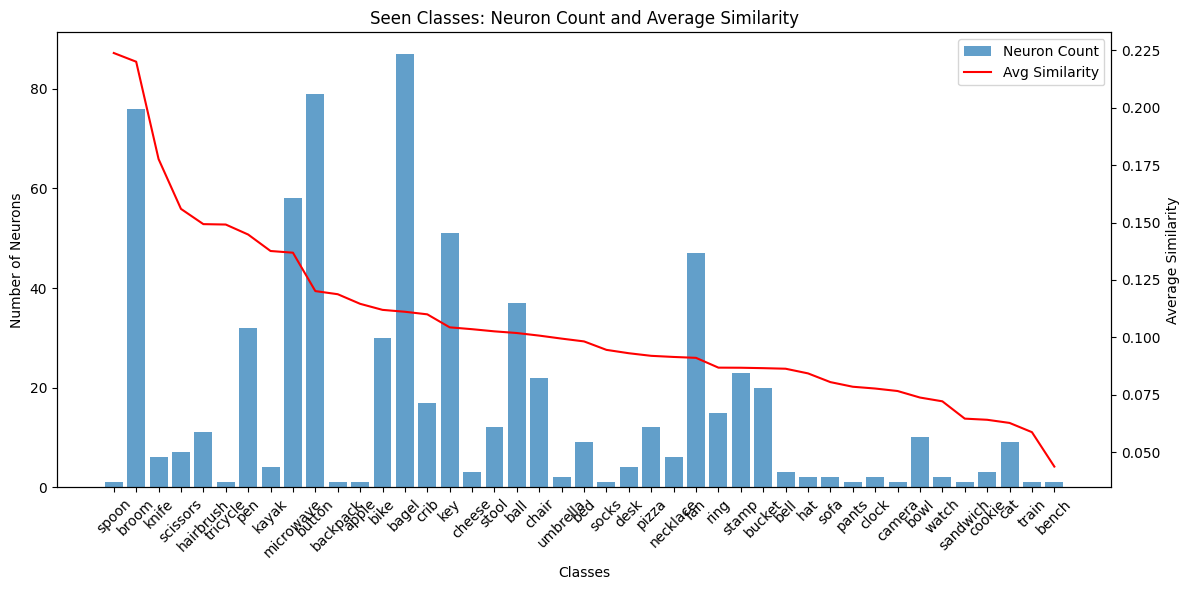

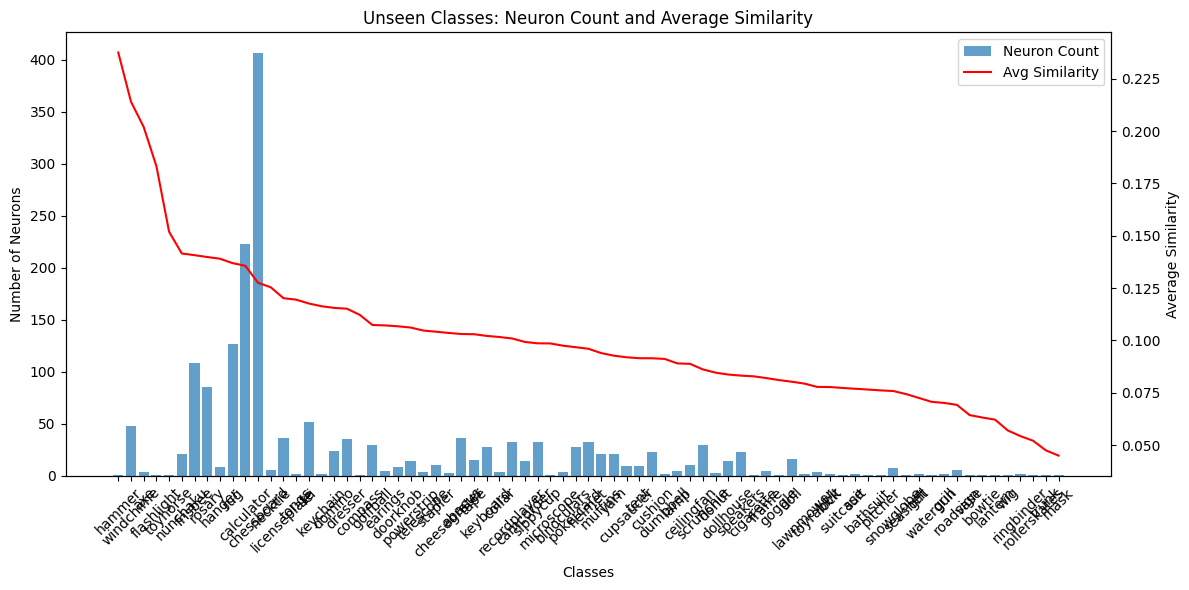

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_classes(classes, df):
    results = []
    for cls in classes:
        neurons = df[df['description'].str.contains(cls, case=False, na=False)]
        if not neurons.empty:
            count = len(neurons)
            avg_similarity = neurons['similarity'].mean()
            results.append({'class': cls, 'neuron_count': count, 'avg_similarity': avg_similarity})
    return pd.DataFrame(results).sort_values('avg_similarity', ascending=False)

seen_results = analyze_classes(baby_seen_class, cvcl_neuron_descriptions)
unseen_results = analyze_classes(baby_unseen_class, cvcl_neuron_descriptions)

def plot_results(results, title):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    x = range(len(results))
    ax1.bar(x, results['neuron_count'], alpha=0.7, label='Neuron Count')
    ax1.set_xlabel('Classes')
    ax1.set_ylabel('Number of Neurons')
    ax1.set_xticks(x)
    ax1.set_xticklabels(results['class'], rotation=45)
    
    ax2 = ax1.twinx()
    ax2.plot(x, results['avg_similarity'], color='red', label='Avg Similarity')
    ax2.set_ylabel('Average Similarity')
    
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot for seen classes
plot_results(seen_results, 'Seen Classes: Neuron Count and Average Similarity')

# Plot for unseen classes
plot_results(unseen_results, 'Unseen Classes: Neuron Count and Average Similarity')

# Find classes that didn't appear in neuron descriptions
